In [14]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Vehicle.csv')

In [3]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
fuel_encoder = LabelEncoder()
seller_type_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
owner_encoder = LabelEncoder()

In [6]:
df.isnull().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [7]:
df["fuel"] = fuel_encoder.fit_transform(df["fuel"])
df["seller_type"] = seller_type_encoder.fit_transform(df["seller_type"])
df["transmission"] = transmission_encoder.fit_transform(df["transmission"])
df["owner"] = owner_encoder.fit_transform(df["owner"])

In [8]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,4,1,1,0,60000
1,Maruti Wagon R LXI Minor,2007,50000,4,1,1,0,135000
2,Hyundai Verna 1.6 SX,2012,100000,1,1,1,0,600000
3,Datsun RediGO T Option,2017,46000,4,1,1,0,250000
4,Honda Amaze VX i-DTEC,2014,141000,1,1,1,2,450000


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X = df.drop(columns=["name","selling_price"],axis=1)

In [12]:
X_transformed = scaler.fit_transform(X)

In [13]:
X_transformed

array([[-1.44507431,  0.08113906,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931],
       [-1.44507431, -0.3476891 ,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931],
       [-0.2587948 ,  0.7243813 , -0.97405145,  0.44819164,  0.33927557,
        -0.66507931],
       ...,
       [-0.97056251,  0.35987736,  1.01499338,  0.44819164,  0.33927557,
         0.95651856],
       [ 0.69022881,  0.50996722, -0.97405145,  0.44819164,  0.33927557,
        -0.66507931],
       [ 0.69022881, -0.56210318,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931]])

In [15]:
def compute_scatter_matrix(X,y):
    n_features = X.shape[1]
    classes = np.unique(y)
    overall_mean = np.mean(X, axis=0)

    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))

    for cls in classes:
        X_c = X[y == cls]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        SW += (X_c - mean_c).T @ (X_c - mean_c)
        mean_diff = (mean_c - overall_mean).reshape(n_features, 1)
        SB += n_c * (mean_diff @ mean_diff.T)

    return SW, SB

In [16]:
y = df["selling_price"]
SW,SB = compute_scatter_matrix(X_transformed,y)

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(SW).dot(SB))

In [19]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [20]:
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [21]:
top_2 = sorted_eigenvectors[:, :2]

In [22]:
X_lda = X_transformed @ top_2

In [23]:
import plotly.express as px

In [25]:
df_plot = pd.DataFrame(
    {
    'LD1': X_lda[:, 0],
    'LD2': X_lda[:, 1],
    }
)

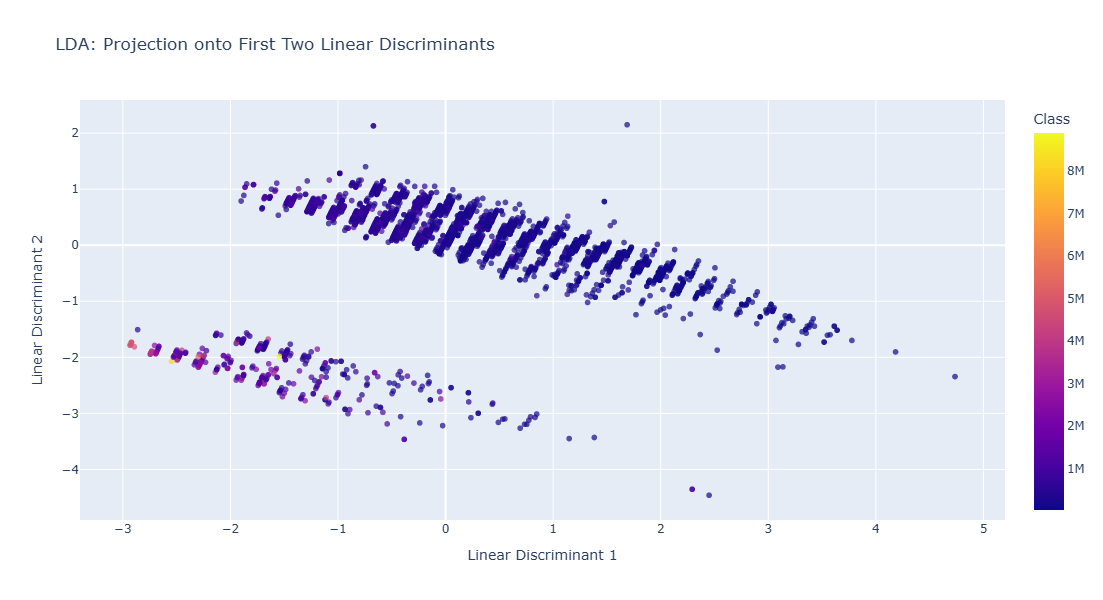

In [29]:
plt_lda = px.scatter(
    df_plot,
    x="LD1",
    y="LD2",
    color="Class",
    title="LDA: Projection onto First Two Linear Discriminants",
    labels={'LD1': 'Linear Discriminant 1', 'LD2': 'Linear Discriminant 2'},
    opacity=0.7
)

plt_lda.update_layout(width=1000, height=600)
plt_lda.show()